# Hi-C Diff

Draw the difference between two Hi-C contact matrices.

In [1]:
import coolbox
from coolbox.api import *

In [2]:
coolbox.__version__

'0.3.0'

In [20]:
data_dir = "../../../tests/test_data/"
cl1 = f"{data_dir}/cool_chr1_89000000_90400000_for_cmp_1.mcool"
cl2 = f"{data_dir}/cool_chr1_89000000_90400000_for_cmp_2.mcool"

region = "chr1:89237500-90307500"

Normalize with `expect` matrix (decay along diagonal), difference with `diff` (matrix_A - matrix_B):

[ERROR:process.py:153 -    diagonal_mean_std()] Error when executing 'stds[stds > 0].min()'


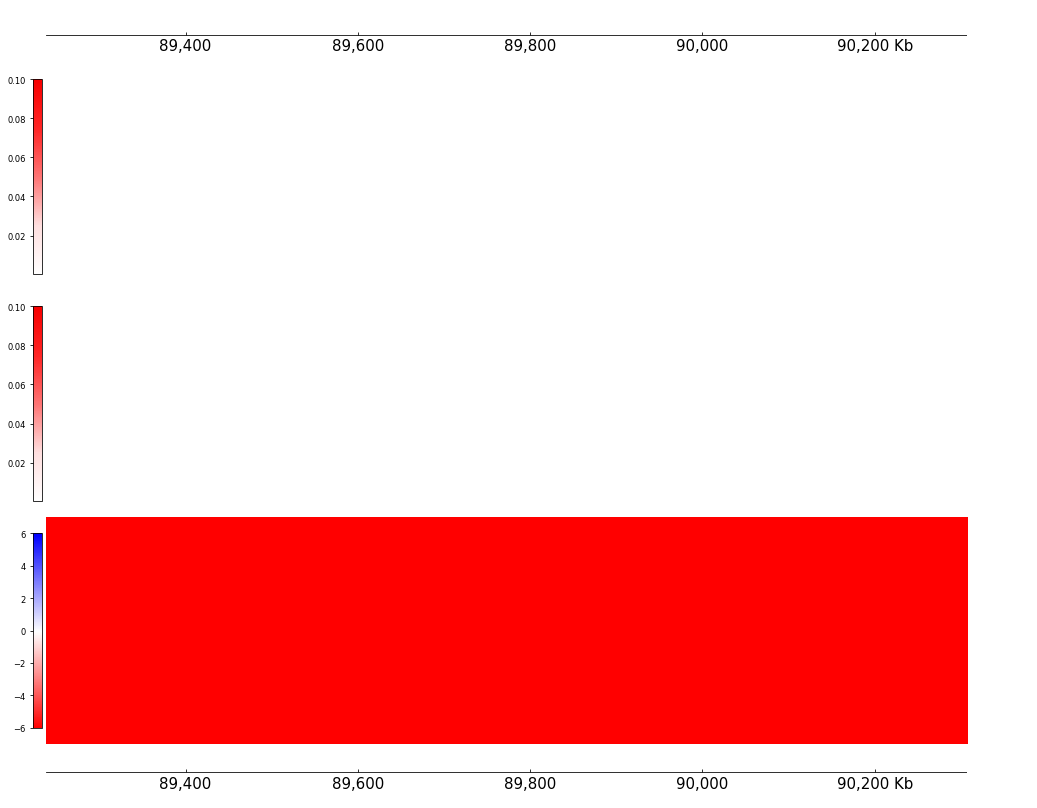

In [22]:
frame = XAxis() + \
    Cool(cl1) + MinValue(5e-4) + MaxValue(1e-1) + \
    Cool(cl2) + MinValue(5e-4) + MaxValue(1e-1) + \
    HiCDiff(cl1, cl2, normalize='expect', diff_method='diff', cmap="bwr_r", args_hic={"transform": False}) + \
    MinValue(-6) + MaxValue(6) + \
    XAxis()
frame *= Feature(depth_ratio=0.35)
frame.plot(region)

### CLI code

In [5]:
%%bash

data_dir="../../../tests/test_data/"
cl1="${data_dir}/cool_chr1_89000000_90400000_for_cmp_1.mcool"
cl2="${data_dir}/cool_chr1_89000000_90400000_for_cmp_2.mcool"

coolbox add XAxis - \
start_with Feature --depth_ratio "0.35" - \
    start_with MinValue "5e-4" - \
    start_with MaxValue "1e-1" - \
        add Cool $cl1 - \
        add Cool $cl2 - \
    end_with - \
    end_with - \
    add HiCDiff $cl1 $cl2 --normalize 'expect' --diff_method 'diff' - \
    add MinValue "-5" - \
    add MaxValue "5" - \
end_with - \
add XAxis - \
goto "chr1:89237500-90307500" - \
plot /tmp/test_coolbox.png